# 단순 선형 회귀분석

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 9775.7412
Epoch 2/2000
1/1 [==============================] - 0s 28ms/step - loss: 2262.5293
Epoch 3/2000
1/1 [==============================] - 0s 31ms/step - loss: 1153.7190
Epoch 4/2000
1/1 [==============================] - 0s 25ms/step - loss: 985.5896
Epoch 5/2000
1/1 [==============================] - 0s 66ms/step - loss: 955.6569
Epoch 6/2000
1/1 [==============================] - 0s 58ms/step - loss: 946.0558
Epoch 7/2000
1/1 [==============================] - 0s 63ms/step - loss: 939.4746
Epoch 8/2000
1/1 [==============================] - 0s 41ms/step - loss: 933.3704
Epoch 9/2000
1/1 [==============================] - 0s 66ms/step - loss: 927.3696
Epoch 10/2000
1/1 [==============================] - 0s 103ms/step - loss: 921.4170
Epoch 11/2000
1/1 [==============================] - 0s 28ms/step - loss: 915.5043
Epoch 12/2000
1/1 [==============================] - 0s 66ms/step - loss: 909.6301
Epoch 13/20

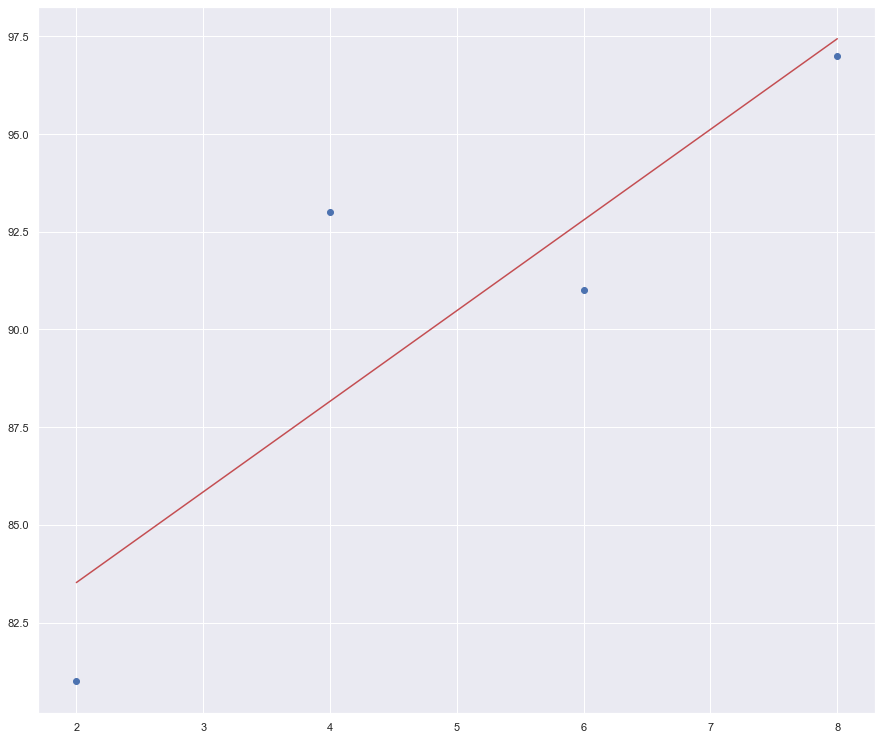

In [ ]:
#######################################################
# [tf + keras] 단순선형회귀 : 공부시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()


In [ ]:
#임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))


1/1 [==============================] - 0s 389ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


In [ ]:
model.get_weights()

[array([[2.3192766]], dtype=float32), array([78.884964], dtype=float32)]

In [ ]:
a = model.get_weights()[0][0][0]
a

2.3192766

In [ ]:
b = model.get_weights()[1][0]
b

78.884964

# 다중 선형 회귀분석

In [ ]:
#######################################################
# [tf + keras] 다중선형회귀 : 공부시간&과외시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 준비
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

# 모델 만들기
model = Sequential()

#입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

# 모델 실행 (train 수행)
hist = model.fit(x, y, epochs=2000)


Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 9302.7559
Epoch 2/2000
1/1 [==============================] - 0s 97ms/step - loss: 1511.6208
Epoch 3/2000
1/1 [==============================] - 0s 18ms/step - loss: 958.2038
Epoch 4/2000
1/1 [==============================] - 0s 33ms/step - loss: 913.8506
Epoch 5/2000
1/1 [==============================] - 0s 50ms/step - loss: 905.3361
Epoch 6/2000
1/1 [==============================] - 0s 38ms/step - loss: 899.3781
Epoch 7/2000
1/1 [==============================] - 0s 48ms/step - loss: 893.6355
Epoch 8/2000
1/1 [==============================] - 0s 124ms/step - loss: 887.9432
Epoch 9/2000
1/1 [==============================] - 0s 153ms/step - loss: 882.2897
Epoch 10/2000
1/1 [==============================] - 0s 24ms/step - loss: 876.6736
Epoch 11/2000
1/1 [==============================] - 0s 31ms/step - loss: 871.0944
Epoch 12/2000
1/1 [==============================] - 0s 58ms/step - loss: 865.5519
Epoch 13/20

In [ ]:
#임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))


1/1 [==============================] - 1s 546ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


In [ ]:
hist.history

{'loss': [9302.755859375,
  1511.620849609375,
  958.2037963867188,
  913.8505859375,
  905.3360595703125,
  899.3780517578125,
  893.635498046875,
  887.9432373046875,
  882.2897338867188,
  876.673583984375,
  871.0943603515625,
  865.5519409179688,
  860.0460205078125,
  854.576171875,
  849.1420288085938,
  843.7434692382812,
  838.38037109375,
  833.052001953125,
  827.7583618164062,
  822.4991455078125,
  817.274169921875,
  812.0831298828125,
  806.925537109375,
  801.801513671875,
  796.7105712890625,
  791.652587890625,
  786.6270141601562,
  781.6340942382812,
  776.6732177734375,
  771.7444458007812,
  766.84716796875,
  761.9815673828125,
  757.1470947265625,
  752.34375,
  747.5711059570312,
  742.8291015625,
  738.1176147460938,
  733.4362182617188,
  728.7847290039062,
  724.1630859375,
  719.5711059570312,
  715.0084228515625,
  710.4747924804688,
  705.97021484375,
  701.4942626953125,
  697.0469360351562,
  692.6281127929688,
  688.2373657226562,
  683.8746337890625,


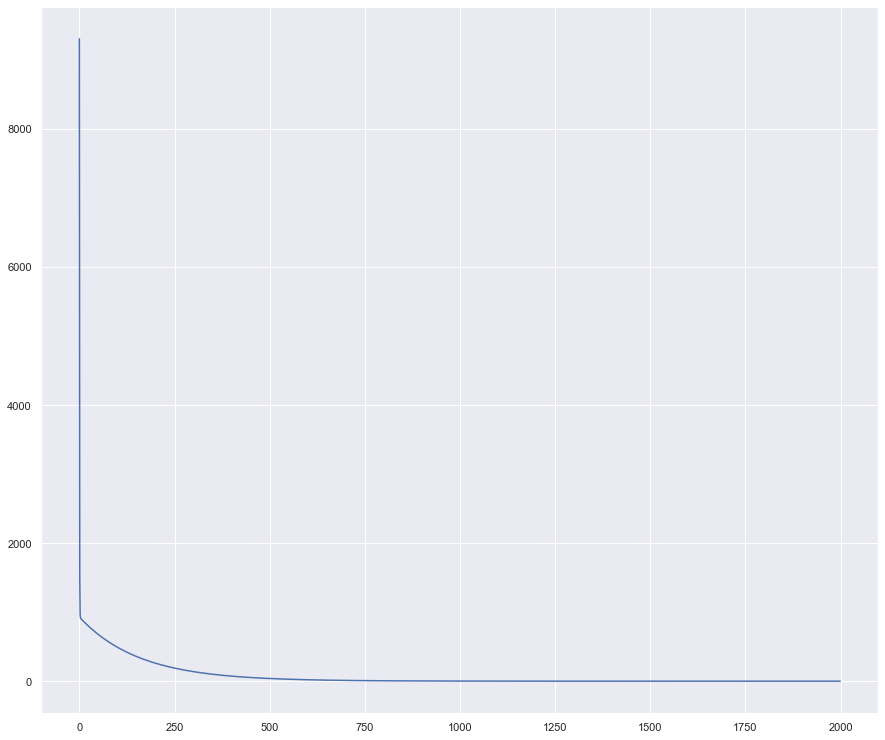

In [ ]:
plt.plot(hist.history['loss'])

# 로지스틱 회귀 분석

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])

X = data[:, 0]
Y = data[:, 1]

print(X)
print(Y)

[ 2  4  6  8 10 12 14]
[0 0 0 1 1 1 1]


In [ ]:
# initial value 
w, b = 1, 2           # 기울기와 절편

# Setting
epochs = 2001
lr = 0.07

w_lst, b_lst, Cost_lst = [], [], []

# sigmoid function 
def sigmoid(w, b, X):
    return 1 / (1 + np.exp(-(b + w * X)))

# ## sigmoid function plot 
# fig = plt.figure(figsize=(7,5))
# x = np.linspace(-10,10,100)
# plt.plot(x,sigmoid(x))
# plt.axhline(0.5, color='red')
# plt.title('Sigmoid Function')
# plt.show()

# cost function : Binary Cross Entropy 
def cost(h):
    return (-(Y * np.log(h) + (1 - Y) * np.log(1 - h))).mean()

for i in range(epochs):
    # calculate err
    err = Y - sigmoid(w, b, X)
    
    # derivative 
    w_diff = (-err * X).mean()
    b_diff = (-err).mean()

    # update 
    w = w - lr * w_diff 
    b = b - lr * b_diff 
    
    h = sigmoid(w, b, X)
    Cost = cost(h)
    
    accuracy = (Y == (h > 0.5)* 1).mean()
    
    w_lst.append(w)
    b_lst.append(b)
    Cost_lst.append(Cost)
    
    if i < 5 or i % 200 == 0:
        print('epochs=%d, 기울기(w)=%.04f, y 절편(b)=%.04f, Cost=%.04f, Accuracy=%.02f' %(i, w, b, Cost, accuracy))


epochs=0, 기울기(w)=0.8805, y 절편(b)=1.9702, Cost=2.3579, Accuracy=0.57
epochs=1, 기울기(w)=0.7612, y 절편(b)=1.9405, Cost=2.1422, Accuracy=0.57
epochs=2, 기울기(w)=0.6422, y 절편(b)=1.9109, Cost=1.9278, Accuracy=0.57
epochs=3, 기울기(w)=0.5237, y 절편(b)=1.8814, Cost=1.7156, Accuracy=0.57
epochs=4, 기울기(w)=0.4062, y 절편(b)=1.8522, Cost=1.5075, Accuracy=0.57
epochs=200, 기울기(w)=0.2089, y 절편(b)=-0.6607, Cost=0.4524, Accuracy=0.71
epochs=400, 기울기(w)=0.3831, y 절편(b)=-2.1134, Cost=0.2965, Accuracy=0.86
epochs=600, 기울기(w)=0.5034, y 절편(b)=-3.0606, Cost=0.2307, Accuracy=1.00
epochs=800, 기울기(w)=0.5953, y 절편(b)=-3.7632, Cost=0.1947, Accuracy=1.00
epochs=1000, 기울기(w)=0.6702, y 절편(b)=-4.3269, Cost=0.1716, Accuracy=1.00
epochs=1200, 기울기(w)=0.7340, y 절편(b)=-4.8014, Cost=0.1552, Accuracy=1.00
epochs=1400, 기울기(w)=0.7900, y 절편(b)=-5.2140, Cost=0.1428, Accuracy=1.00
epochs=1600, 기울기(w)=0.8400, y 절편(b)=-5.5810, Cost=0.1329, Accuracy=1.00
epochs=1800, 기울기(w)=0.8856, y 절편(b)=-5.9129, Cost=0.1249, Accuracy=1.00
epochs=2000, 기울기

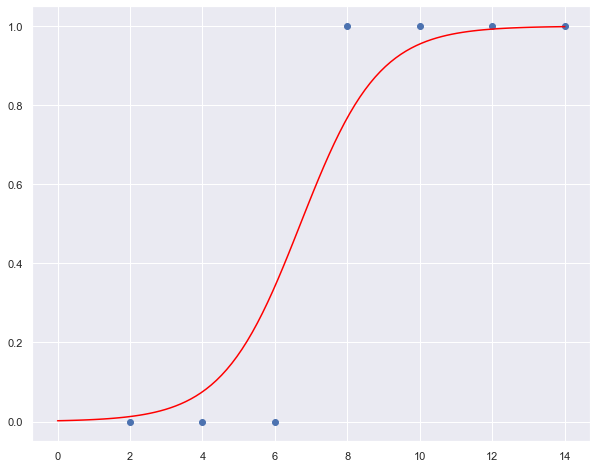

In [ ]:
fig = plt.figure(figsize=(10,8))

x_range = np.linspace(0, 14, 100)
plt.scatter(X, Y)
plt.plot(x_range, sigmoid(w_lst[-1], b_lst[-1], x_range), color='red')
plt.show()

In [ ]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]
Y = data[:, 1]

# weight와 bias의 초기값 설정
w, b = 1, 2     # 기울기, 절편
lr = 0.1       # 학습률
epoch = 5001    # 학습횟수

# 시그모이드 함수 정의
def sigmoid(w, b, X):
    return 1 / (1 + np.exp(-(w*X + b)))

# cost함수 정의  : Binary Cross Entropy
def cost(h):
    return (- (Y * np.log(h) + (1 - Y) * np.log(1 - h))).mean()

# 경사 하강법 실시
for i in range(epoch):
    error = sigmoid(w, b, X) - Y  # 각 x에서의 오차(편차)
    w_diff = (error * X).mean()     # cost를 w로 미분
    b_diff = error.mean()           # cost를 b로 미분

    # w와 b 업데이트
    w = w - lr * w_diff
    b = b - lr * b_diff
    h = sigmoid(w, b, X)
    
    if i % 200 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, w, b, cost(h)))

epoch=0, 기울기=0.8293, 절편=1.9574  Cost=2.2652
epoch=200, 기울기=0.2933, 절편=-1.3791  Cost=0.3656
epoch=400, 기울기=0.4888, 절편=-2.9470  Cost=0.2375
epoch=600, 기울기=0.6184, 절편=-3.9380  Cost=0.1870
epoch=800, 기울기=0.7170, 절편=-4.6750  Cost=0.1593
epoch=1000, 기울기=0.7977, 절편=-5.2706  Cost=0.1412
epoch=1200, 기울기=0.8668, 절편=-5.7759  Cost=0.1281
epoch=1400, 기울기=0.9276, 절편=-6.2183  Cost=0.1182
epoch=1600, 기울기=0.9823, 절편=-6.6141  Cost=0.1102
epoch=1800, 기울기=1.0322, 절편=-6.9740  Cost=0.1036
epoch=2000, 기울기=1.0783, 절편=-7.3051  Cost=0.0980
epoch=2200, 기울기=1.1212, 절편=-7.6126  Cost=0.0932
epoch=2400, 기울기=1.1614, 절편=-7.9005  Cost=0.0889
epoch=2600, 기울기=1.1993, 절편=-8.1715  Cost=0.0852
epoch=2800, 기울기=1.2353, 절편=-8.4280  Cost=0.0818
epoch=3000, 기울기=1.2695, 절편=-8.6718  Cost=0.0788
epoch=3200, 기울기=1.3022, 절편=-8.9045  Cost=0.0761
epoch=3400, 기울기=1.3335, 절편=-9.1271  Cost=0.0735
epoch=3600, 기울기=1.3636, 절편=-9.3408  Cost=0.0712
epoch=3800, 기울기=1.3926, 절편=-9.5464  Cost=0.0690
epoch=4000, 기울기=1.4205, 절편=-9.7446  Cost=0.0670


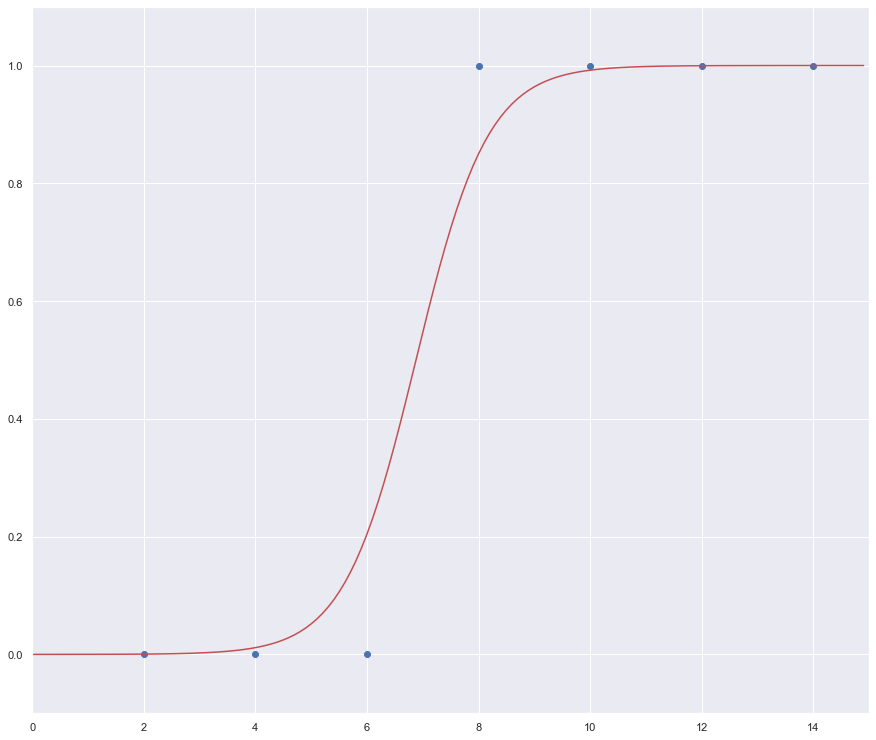

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(w, b, x_range),"r")
plt.show()

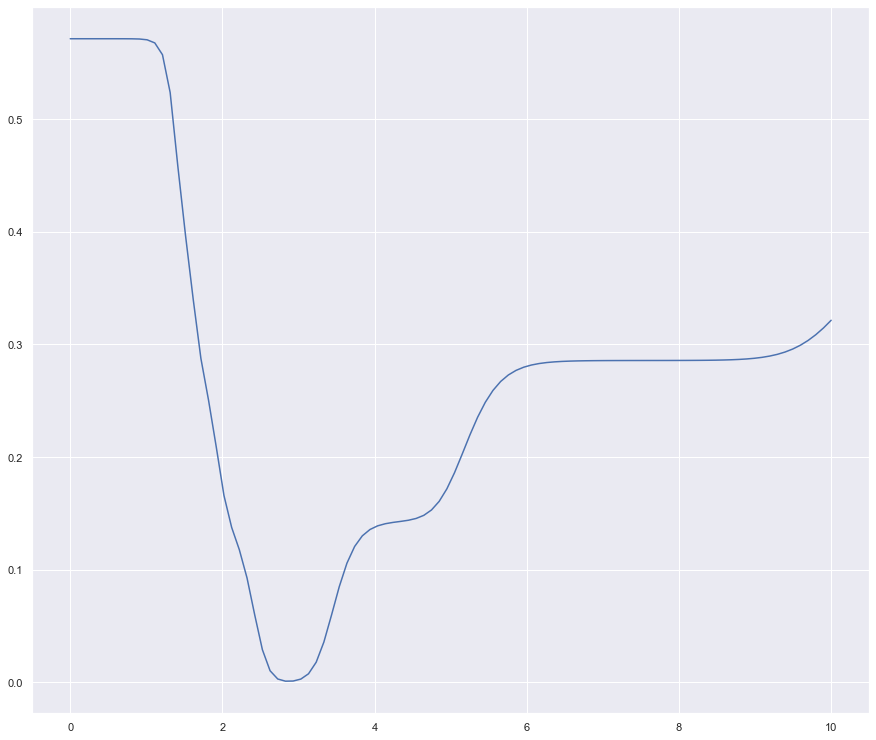

In [ ]:
b = -20
w = np.linspace(0,10,100)
# test = ((Y - sigmoid(w, b, X))**2).mean()

test = []
for i in range(100):
    test.append(((Y - sigmoid(w[i], b, X))**2).mean())

plt.plot(w,test)